2.9868370882920434


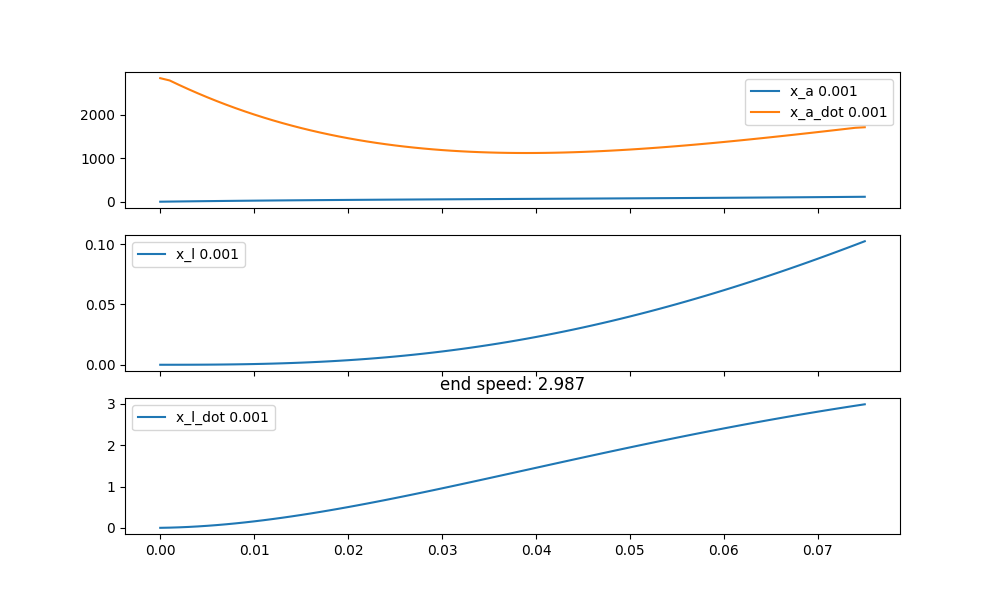

In [156]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget


T1 = 0.00025 #0.035 m / 140 rad from TSA test
T2 = 5 #guess for leg movement/string contract
m_a = 1/2 * 0.020 * 0.010**2 #cylinder MOI 20g 10mm radius
m_l = 0.5 #mass to push off ground
k = 10000 # no idea honestly

tau_max = 0.05 #N*m stall torque
omega_max = 3000 #about 10,000rpm free speed

c1 = -k * T1**2 * omega_max / tau_max
c2 = k * T1 * omega_max / (tau_max * T2)
c3 = k * T1 / (T2 * m_l)
c4 = -k / (T2**2 * m_l)

# Xdot = A*X where X = [x_a, x_l, x_l_dot]
A = np.array([
    [c1, c2, 0],
    [0, 0, 1],
    [c3, c4, 0],
])
b = [omega_max, 0, 0]


def f(X):
    X = np.array(X).reshape(3)
    return A@X + b

def RK4(f, X, dt):
    # Runge-Kutta 4 integration
    k1 = f(X)
    k2 = f(X + (dt/2)*k1)
    k3 = f(X + (dt/2)*k2)
    k4 = f(X + dt*k3)
    return X + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)

X = np.array([0, 0, 0])
log = []

dt = 0.001
times = []
for ti in np.arange(0, 0.5, dt):
    X = RK4(f, X, dt)
    times.append(ti)
    log.append(X)

    if(X[1] > 0.1 or X[2] < 0):
        break

log = np.array(log)
endv = log[:,2][-1]
print(endv)

fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10,6))
axs[0].plot(times, log[:,0], label=f'x_a {dt}')

axs[0].plot(times, np.gradient(log[:,0])/dt, label=f'x_a_dot {dt}')

axs[1].plot(times, log[:,1], label=f'x_l {dt}')

axs[2].plot(times, log[:,2], label=f'x_l_dot {dt}')
axs[2].set_title(f'end speed: {np.round(endv, 3)}')

for ax in axs:
    ax.legend()
plt.show()

In [157]:
from numpy import sqrt, exp

x_ls = []

for t in times:

    x0 = T1*T2*omega_max
    x1 = tau_max**2
    x2 = 4*x1
    x3 = k*m_l
    x4 = T1**4*T2**2*omega_max**2
    x5 = -x2 + x3*x4

    x3 = np.complex64(x3)

    x6 = sqrt(x3*x5)
    x7 = T1**2*omega_max
    x8 = T2*x7
    x9 = x6*x8
    x10 = x3*x8
    x11 = x10 + x6
    x12 = x2*x3
    x13 = k**2*m_l**2
    x14 = sqrt(-x12 + x13*x4)
    x15 = x10 - x14
    x16 = 2*T2*m_l*tau_max
    x17 = x16/x15
    x18 = (k != 0)
    x19 = 1/(T2*m_l)
    x20 = (1/2)*t/tau_max
    x21 = x19*x20
    x22 = 2*x1
    x23 = x0*x22
    x24 = x23*exp(-x15*x21)/(x10 - x6)
    x25 = k*x7
    x26 = x19*x6
    x27 = x10 + x14
    x28 = x16/x27
    x29 = x3/x6
    x30 = x23*exp(-x21*x27)/x11
    x31 = tau_max**4
    x32 = T1**6*T2**3*omega_max**3
    x33 = 2*x31
    x34 = T1**8*T2**4*omega_max**4*x13
    x35 = x12*x4
    x_lcode = t*x0 + x11*x24*((x17) if x18 else (0))/(x5 + x9) - x24*x29*((x17*exp(x20*(x25 - x26))) if (x15 != 0) else (t)) + x29*x30*((x28*exp(x20*(x25 + x26))) if (x27 != 0) else (t)) - x3*x30*(-x22*x9 + x3*x32*x6 + x33 + x34 - x35)*((x28) if x18 else (0))/(T1**10*T2**5*k**3*m_l**3*omega_max**5 - 6*x1*x13*x32 + 8*x10*x31 + x33*x6 + x34*x6 - x35*x6)
    
    x_ls.append(np.real(x_lcode))

x_ls = np.array(x_ls)

axs[1].plot(times, x_ls, label=f'x_lcode')
axs[1].legend()

In [152]:
X = np.array([0, 0, 0])
log = []

dt = 0.001
times = []
for ti in np.arange(0, 0.5, dt):
    X = RK4(f, X, dt)
    times.append(ti)
    log.append(X)

    if(X[1] > 0.1 or X[2] < 0):
        break

log = np.array(log)

axs[0].plot(times, log[:,0], label=f'x_a {dt}')

axs[0].plot(times, np.gradient(log[:,0])/dt, label=f'x_a_dot {dt}')

axs[1].plot(times, log[:,1], label=f'x_l {dt}')

axs[2].plot(times, log[:,2], label=f'x_l_dot {dt}')

for ax in axs:
    ax.legend()